<a href="https://colab.research.google.com/github/Jsims398/CS-180-BYU-Projects/blob/main/JS_data_science_lab_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/porterjenkins/CS180/blob/main/data_science_labs/data_science_lab_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# BYU CS 180 Lab 11

In [ ]:
# Dependencies for the lab
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

## Introduction:
You will use the `sklearn` API to train various classifiers. Feel free to use any `sklearn`, `numpy`, or `pandas` function to help you with the lab.

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics. The 20 categories are:
```
['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
```
The posts are raw text. For example:

**Post:**
```
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----
```

**Target:**
```
'rec.autos'
```

Your task will be to build a classifier to predict the category of posts. You will do the following in this notebook:

## Exercise 1: Retrieve the Data
Download `fetch_20newsgroups` dataset

In [ ]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
docs = data['data']
targets = data["target"]
names = data.target_names

Print off the first document and its target classification to make sure its been downloaded correctly

In [ ]:
df = pd.DataFrame({'Document': docs, 'Target': targets})
print(df['Document'])

0        From: lerxst@wam.umd.edu (where's my thing)\nS...
1        From: guykuo@carson.u.washington.edu (Guy Kuo)...
2        From: twillis@ec.ecn.purdue.edu (Thomas E Will...
3        From: jgreen@amber (Joe Green)\nSubject: Re: W...
4        From: jcm@head-cfa.harvard.edu (Jonathan McDow...
                               ...                        
11309    From: jim.zisfein@factory.com (Jim Zisfein) \n...
11310    From: ebodin@pearl.tufts.edu\nSubject: Screen ...
11311    From: westes@netcom.com (Will Estes)\nSubject:...
11312    From: steve@hcrlgw (Steven Collins)\nSubject: ...
11313    From: gunning@cco.caltech.edu (Kevin J. Gunnin...
Name: Document, Length: 11314, dtype: object


## Exercise 2: Understand the Data

Perform some exploratory analysis on your data. Specifically, plot a bar chart showing distribution of the categories (classes)

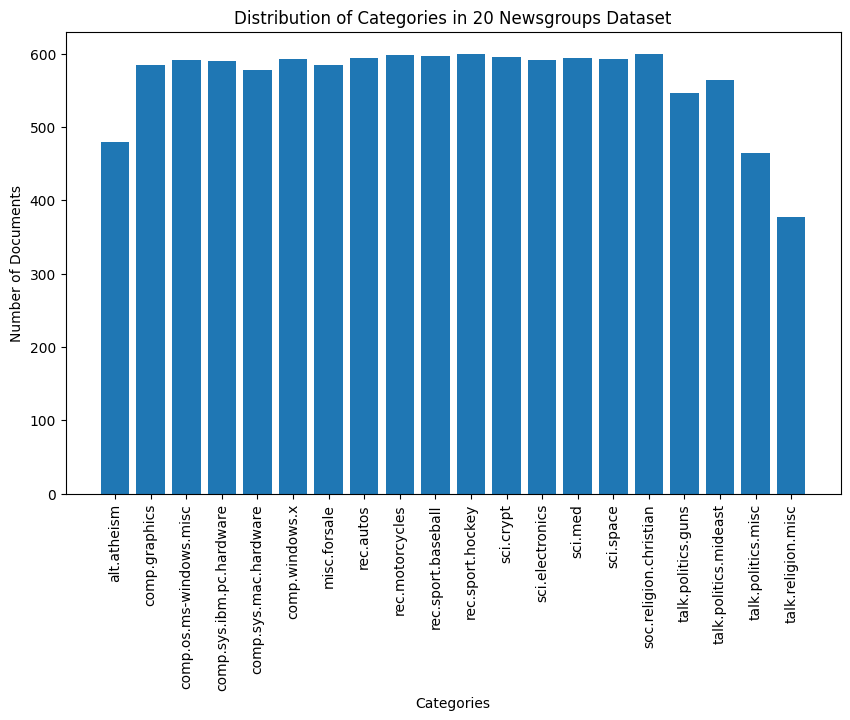

In [ ]:
category_counts = df['Target'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(names, category_counts)
plt.xlabel('Categories')
plt.ylabel('Number of Documents')
plt.title('Distribution of Categories in 20 Newsgroups Dataset')
plt.xticks(rotation=90)
plt.show()

## Exercise 3: Engineer the Data
Extract features from raw text. You are free to be creative here. There is no correct answer. Try and think of the features (input) that are most predictive of the category. Some helpful sklearn feature engineering code can be found here (I'd recommend reading through the documentation before diving in and trying to get these tools to work):

* [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer)
* [TFIDF Text Features](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    tokens = [stemmer.stem(word) for word in tokens]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

df['Processed_Text'] = df['Document'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tfidf_vectorizer = TfidfVectorizer()

X_tfidf = tfidf_vectorizer.fit_transform(df['Processed_Text'])
y = targets

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


## Exercise 5: Train the Model

Using sklearn, train the following three classifiers using the training set:
* KNN
* Decision Tree
* Logistic Regression

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors (KNN) Accuracy: {accuracy_knn}")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors (KNN) Accuracy: 0.8285461776403005
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86        97
           1       0.67      0.79      0.72       104
           2       0.61      0.70      0.66       115
           3       0.63      0.67      0.65       123
           4       0.72      0.76      0.74       126
           5       0.76      0.75      0.76       106
           6       0.67      0.54      0.60       109
           7       0.84      0.88      0.86       139
           8       0.88      0.86      0.87       122
           9       0.97      0.95      0.96       102
          10       0.90      0.94      0.92       108
          11       0.92      0.95      0.93       125
          12       0.87      0.75      0.81       114
          13       0.93      0.86      0.89       119
          14       0.94      0.94      0.94       127
          15       0.88      0.88      0.88       122
   

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Classifier Accuracy: {accuracy_dt}")
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Classifier Accuracy: 0.6509058771542201
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.65      0.68        97
           1       0.45      0.58      0.50       104
           2       0.54      0.58      0.56       115
           3       0.45      0.46      0.45       123
           4       0.73      0.60      0.66       126
           5       0.62      0.66      0.64       106
           6       0.52      0.61      0.56       109
           7       0.69      0.61      0.65       139
           8       0.76      0.78      0.77       122
           9       0.72      0.77      0.75       102
          10       0.82      0.81      0.81       108
          11       0.87      0.86      0.86       125
          12       0.45      0.47      0.46       114
          13       0.63      0.62      0.63       119
          14       0.74      0.71      0.73       127
          15       0.67      0.73      0.70       122
    

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train, y_train)
y_pred_lr = logistic_regression.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr}")
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8890852850198852
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        97
           1       0.75      0.88      0.81       104
           2       0.81      0.83      0.82       115
           3       0.73      0.76      0.75       123
           4       0.90      0.80      0.85       126
           5       0.86      0.89      0.87       106
           6       0.73      0.83      0.77       109
           7       0.93      0.91      0.92       139
           8       0.94      0.94      0.94       122
           9       0.97      0.98      0.98       102
          10       0.99      0.94      0.96       108
          11       0.99      0.95      0.97       125
          12       0.84      0.84      0.84       114
          13       0.97      0.96      0.97       119
          14       0.96      0.97      0.96       127
          15       0.82      0.88      0.85       122
         

## Exercise 6: Evaluate the Model
Compare the performance of your classifiers on the test set. Discuss which one performs the best.

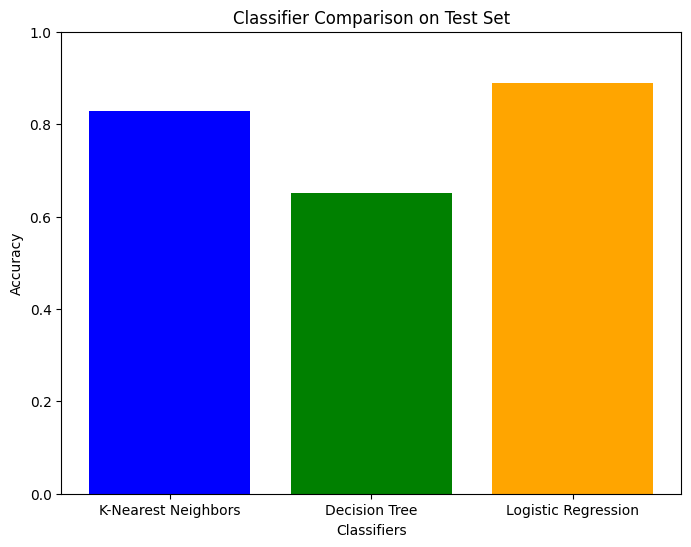

In [ ]:
import matplotlib.pyplot as plt

accuracies = [accuracy_knn, accuracy_dt, accuracy_lr]
classifiers = ['K-Nearest Neighbors', 'Decision Tree', 'Logistic Regression']

plt.figure(figsize=(8, 6))
plt.bar(classifiers, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Classifier Comparison on Test Set')
plt.ylim(0, 1)
plt.show()


Discuss which one performs the best:

Logistic Regression has the best accuracy for splitting the data. However KNN also preformed really well with the dataset too.